In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11


In [13]:
# Fixed file paths
df_1b = pd.read_excel("cleaned_data/cleaned_table_1b.xlsx")
df_2b = pd.read_excel("cleaned_data/cleaned_table_2b.xlsx")
df_1d = pd.read_excel("cleaned_data/cleaned_table_1d.xlsx")
df_9b = pd.read_excel("cleaned_data/cleaned_table_9b.xlsx")
df_9e = pd.read_excel("cleaned_data/cleaned_table_9e.xlsx")
df_10b = pd.read_excel("cleaned_data/cleaned_table_10b.xlsx")

def strip_ccg_code(df):
    df = df.copy()
    if "CCG Code" in df.columns:
        # Preserve real NaNs, strip whitespace on strings, then convert bogus strings back to NaN
        df["CCG Code"] = df["CCG Code"].astype(object)
        df["CCG Code"] = df["CCG Code"].where(df["CCG Code"].notna(), None)
        df["CCG Code"] = df["CCG Code"].astype(str).str.strip()
        df.loc[df["CCG Code"].isin(["None", "nan", "NaN", ""]), "CCG Code"] = np.nan
    return df

df_1b = strip_ccg_code(df_1b)
df_2b = strip_ccg_code(df_2b)
df_1d = strip_ccg_code(df_1d)
df_9b = strip_ccg_code(df_9b)
df_9e = strip_ccg_code(df_9e)
df_10b = strip_ccg_code(df_10b)

print("1b:", df_1b.shape)
print("2b:", df_2b.shape)
print("1d:", df_1d.shape)
print("9b:", df_9b.shape)
print("9e:", df_9e.shape)
print("10b:", df_10b.shape)

display(df_1b.head())
display(df_2b.head())
display(df_1d.head())
display(df_9b.head())
display(df_9e.head())
display(df_10b.head())


1b: (214, 5)
2b: (214, 11)
1d: (214, 17)
9b: (215, 16)
9e: (243, 17)
10b: (1088, 45)


,CCG Name,Referrals received(2),Referrals entering treatment(3),Referrals finishing a course of treatment(4),CCG Code
0,NHS Darlington CCG,1925,1310,885,00C
1,"NHS Durham Dales, Easington and Sedgefield CCG",5120,3420,2220,00D
2,NHS Gateshead CCG,5495,4200,3150,00F
3,NHS Newcastle North and East CCG,5140,3400,1745,00G
4,NHS Newcastle West CCG,4125,2485,1210,00H


,CCG Code,CCG Name,Total Referrals to Treatment,<28 days,29-56 days,57-90 days,>90 days,<6 weeks,<18 weeks,Average time,Ended prior to treatment
0,00C,NHS Darlington CCG,1310,1210,75,25,*,1260,1310,12.6,535
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",3420,3115,240,45,20,3275,3415,13.5,1530
2,00F,NHS Gateshead CCG,4200,4020,155,20,5,4135,4195,10.0,1440
3,00G,NHS Newcastle North and East CCG,3400,2575,485,225,115,2835,3365,23.3,1650
4,00H,NHS Newcastle West CCG,2485,1740,435,230,75,1985,2460,25.6,1515


,CCG Code,CCG Name,Referrals finishing a course of treatment(5),Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Unspecified
0,00C,NHS Darlington CCG,885,1.4,5.5,*,0.9,2.5,*,*,0.6,*,*,*,1.6,*,91.5
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220,1.6,6.3,*,1.1,4.3,0.2,*,0.3,0.2,*,*,0.6,*,91.4
2,00F,NHS Gateshead CCG,3150,13.2,52.9,0.9,11.2,29.6,1.6,0.6,3.5,2.2,2.6,0.8,2.1,1.5,23.6
3,00G,NHS Newcastle North and East CCG,1745,19.1,53.2,0.5,21.9,18.6,1.9,4.6,1.6,2,2,*,2.5,1.9,23.2
4,00H,NHS Newcastle West CCG,1210,17.6,52.1,1.2,18.1,19.8,1.8,3.4,2.3,2.7,2.8,*,2.4,1.3,26.5


,CCG Code,CCG Name,Referrals finishing a course of treatment,Referrals finishing a course of treatment who were initially at caseness,Referrals finishing a course of treatment who were initially not at caseness,Reliable Improvement,Reliable Improvement(%),No Reliable Change,No Reliable Change(%),Reliable Deterioration,Reliable Deterioration(%),Recovered,Recovered(%),Reliable Recovery,Reliable Recovery(%),Paired Scores(11)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00C,NHS Darlington CCG,885.0,810.0,80.0,595.0,67.2,250.0,28.2,40.0,4.6,390.0,48.0,375.0,46.6,885.0
2,00D,"NHS Durham Dales, Easington and Sedgefield CCG",2220.0,2060.0,160.0,1445.0,65.1,630.0,28.4,140.0,6.3,965.0,46.7,935.0,45.3,2215.0
3,00F,NHS Gateshead CCG,3150.0,2990.0,160.0,2235.0,71.0,770.0,24.5,145.0,4.5,1620.0,54.1,1575.0,52.7,3150.0
4,00G,NHS Newcastle North and East CCG,1745.0,1525.0,185.0,1025.0,58.9,535.0,30.7,90.0,5.2,655.0,42.0,625.0,40.1,1655.0


,CCG Code,CCG Name,Depression,Anxiety and stress related disorders (Total),Agoraphobia,Generalized anxiety disorder,Mixed anxiety and depressive disorder,Obsessive-compulsive disorder,Other anxiety or stress related disorder,Panic disorder (episodic paroxysmal anxiety),Post-traumatic stress disorder,Social phobias,Specific (isolated) phobias,Other Mental Health problems,Other recorded problems,Invalid data supplied,Unspecified
0,00C,NHS Darlington CCG,58.3,47.7,*,*,50,*,*,*,*,*,*,50,*,*,47.8
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",61.1,56,*,65.2,52.7,*,*,*,*,*,*,50,*,*,45.8
2,00F,NHS Gateshead CCG,61.9,54.7,44.4,72.6,47.9,63.8,38.9,63.1,53.8,49.3,61.9,61,58.5,63.8,44.8
3,00G,NHS Newcastle North and East CCG,46.4,41,*,43.3,38.3,41.9,45.5,65.4,24.2,31,*,46.2,65.5,*,38.1
4,00H,NHS Newcastle West CCG,40.2,39.5,*,41.5,38.5,50,41.2,54.2,19.4,40.6,*,33.3,*,*,27.3


,CCG Code,CCG Name,Age Group,Referrals finishing a course of treatment,Referrals with a finished course of treatment who were initially at caseness,Referrals finishing a course of treatment who were initially not at caseness,Reliable Improvement,Reliable Improvement(%),No reliable Change,No reliable Change(%),...,Reliable Improvement(%) - Female,No reliable Change - Female,No reliable Change(%) - Female,Reliable Deterioration - Female,Reliable Deterioration(%) - Female,Recovered - Female,Recovered(%) - Female,Reliable Recovery - Female,Reliable Recovery(%) - Female,Paired Scores - Female
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Under 16,42,31,10,17,40.5,20,47.6,...,42.3,12,46.2,2,7.7,10,52.6,9,47.4,25
2,NaN,NaN,16 to 17,4290,3861,399,2299,53.6,1509,35.2,...,53.5,1099,35.4,218,7,1020,35.6,968,33.8,2980
3,NaN,NaN,18 to 35,186651,169521,15868,112122,60.1,56292,30.2,...,60.9,36828,29.5,7816,6.3,48928,42.6,46769,40.8,120710
4,NaN,NaN,36 to 64,244693,218283,24559,149885,61.3,70888,29,...,62,43204,28.2,9699,6.3,62930,45.6,60212,43.6,147698


In [14]:
# 1b columns:
# 'CCG Name', 'Referrals received(2)',
# 'Referrals entering treatment(3)',
# 'Referrals finishing a course of treatment(4)', 'CCG Code'

ccg_base = df_1b[
    [
        "CCG Code",
        "CCG Name",
        "Referrals received(2)",
        "Referrals entering treatment(3)",
        "Referrals finishing a course of treatment(4)",
    ]
].copy()

for col in [
    "Referrals received(2)",
    "Referrals entering treatment(3)",
    "Referrals finishing a course of treatment(4)",
]:
    ccg_base[col] = pd.to_numeric(ccg_base[col], errors="coerce")

ccg_base["entry_rate"] = (
    ccg_base["Referrals entering treatment(3)"]
    / ccg_base["Referrals received(2)"]
    * 100.0
)

ccg_base["completion_rate"] = (
    ccg_base["Referrals finishing a course of treatment(4)"]
    / ccg_base["Referrals entering treatment(3)"]
    * 100.0
)

print("Base CCG throughput (1b):")
display(ccg_base.head())


Base CCG throughput (1b):


,CCG Code,CCG Name,Referrals received(2),Referrals entering treatment(3),Referrals finishing a course of treatment(4),entry_rate,completion_rate
0,00C,NHS Darlington CCG,1925,1310,885,68.051948,67.557252
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",5120,3420,2220,66.796875,64.912281
2,00F,NHS Gateshead CCG,5495,4200,3150,76.433121,75.000000
3,00G,NHS Newcastle North and East CCG,5140,3400,1745,66.147860,51.323529
4,00H,NHS Newcastle West CCG,4125,2485,1210,60.242424,48.692153


In [15]:
# 2b columns:
# 'CCG Code', 'CCG Name', 'Total Referrals to Treatment',
# '<28 days', '29-56 days', '57-90 days', '>90 days',
# '<6 weeks', '<18 weeks', 'Average time', 'Ended prior to treatment'

df_2b_clean = df_2b.copy()

wait_numeric_cols = [
    "Total Referrals to Treatment",
    "<28 days",
    "29-56 days",
    "57-90 days",
    ">90 days",
    "<6 weeks",
    "<18 weeks",
    "Average time",
    "Ended prior to treatment",
]

for col in wait_numeric_cols:
    df_2b_clean[col] = pd.to_numeric(df_2b_clean[col], errors="coerce")

df_2b_clean["total_decision_referrals"] = (
    df_2b_clean["Total Referrals to Treatment"]
    + df_2b_clean["Ended prior to treatment"]
)

df_2b_clean["ended_before_rate"] = (
    df_2b_clean["Ended prior to treatment"]
    / df_2b_clean["total_decision_referrals"]
    * 100.0
)

df_2b_clean["avg_wait_days"] = df_2b_clean["Average time"]

print("Waiting-time / ended-before summary (2b):")
display(
    df_2b_clean[
        [
            "CCG Code",
            "Total Referrals to Treatment",
            "avg_wait_days",
            "Ended prior to treatment",
            "ended_before_rate",
        ]
    ].head()
)


Waiting-time / ended-before summary (2b):


,CCG Code,Total Referrals to Treatment,avg_wait_days,Ended prior to treatment,ended_before_rate
0,00C,1310,12.6,535,28.997290
1,00D,3420,13.5,1530,30.909091
2,00F,4200,10.0,1440,25.531915
3,00G,3400,23.3,1650,32.673267
4,00H,2485,25.6,1515,37.875000


In [16]:
# 9b columns include:
# 'CCG Code', 'CCG Name',
# 'Referrals finishing a course of treatment',
# 'Reliable Improvement(%)', 'Recovered(%)', 'Reliable Recovery(%)', ...

df_9b_clean = df_9b[df_9b["CCG Code"].notna()].copy()

outcome_numeric_cols = [
    "Referrals finishing a course of treatment",
    "Referrals finishing a course of treatment who were initially at caseness",
    "Referrals finishing a course of treatment who were initially not at caseness",
    "Reliable Improvement",
    "Reliable Improvement(%)",
    "No Reliable Change",
    "No Reliable Change(%)",
    "Reliable Deterioration",
    "Reliable Deterioration(%)",
    "Recovered",
    "Recovered(%)",
    "Reliable Recovery",
    "Reliable Recovery(%)",
    "Paired Scores(11)",
]

for col in outcome_numeric_cols:
    df_9b_clean[col] = pd.to_numeric(df_9b_clean[col], errors="coerce")

print("Outcome summary (9b):")
display(
    df_9b_clean[
        [
            "CCG Code",
            "Referrals finishing a course of treatment",
            "Reliable Improvement(%)",
            "Recovered(%)",
            "Reliable Recovery(%)",
        ]
    ].head()
)


Outcome summary (9b):


,CCG Code,Referrals finishing a course of treatment,Reliable Improvement(%),Recovered(%),Reliable Recovery(%)
1,00C,885.0,67.2,48.0,46.6
2,00D,2220.0,65.1,46.7,45.3
3,00F,3150.0,71.0,54.1,52.7
4,00G,1745.0,58.9,42.0,40.1
5,00H,1210.0,55.9,36.2,34.7


In [17]:
# 1d columns include:
# 'CCG Code', 'CCG Name',
# 'Referrals finishing a course of treatment(5)', ... , 'Unspecified'

df_1d_clean = df_1d.copy()

df_1d_clean["Referrals finishing a course of treatment(5)"] = pd.to_numeric(
    df_1d_clean["Referrals finishing a course of treatment(5)"], errors="coerce"
)
df_1d_clean["Unspecified"] = pd.to_numeric(
    df_1d_clean["Unspecified"], errors="coerce"
)

# In this cleaned file, 'Unspecified' is a percentage of finished cases
df_1d_clean["unspecified_share_finished"] = df_1d_clean["Unspecified"]

print("Problem-mix / unspecified summary (1d):")
display(
    df_1d_clean[
        [
            "CCG Code",
            "Referrals finishing a course of treatment(5)",
            "unspecified_share_finished",
        ]
    ].head()
)


Problem-mix / unspecified summary (1d):


,CCG Code,Referrals finishing a course of treatment(5),unspecified_share_finished
0,00C,885,91.5
1,00D,2220,91.4
2,00F,3150,23.6
3,00G,1745,23.2
4,00H,1210,26.5


In [18]:
# 9e columns include:
# 'CCG Code', 'CCG Name', ..., 'Unspecified'

df_9e_clean = df_9e.copy()
df_9e_clean["Unspecified"] = pd.to_numeric(
    df_9e_clean["Unspecified"], errors="coerce"
)

# This is the recovery percentage for cases recorded as "Unspecified"
df_9e_clean["unspecified_recovery_pct"] = df_9e_clean["Unspecified"]

print("Unspecified recovery% (9e):")
display(
    df_9e_clean[
        ["CCG Code", "CCG Name", "unspecified_recovery_pct"]
    ].head()
)


Unspecified recovery% (9e):


,CCG Code,CCG Name,unspecified_recovery_pct
0,00C,NHS Darlington CCG,47.8
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",45.8
2,00F,NHS Gateshead CCG,44.8
3,00G,NHS Newcastle North and East CCG,38.1
4,00H,NHS Newcastle West CCG,27.3


In [19]:
# 10b columns include (for each age group per CCG):
# 'CCG Code', 'CCG Name', 'Age Group',
# 'Referrals finishing a course of treatment', 'Recovered', 'Recovered(%)', ...

df_10b_clean = df_10b[df_10b["CCG Code"].notna()].copy()

for col in [
    "Referrals finishing a course of treatment",
    "Recovered",
    "Recovered(%)",
]:
    df_10b_clean[col] = pd.to_numeric(df_10b_clean[col], errors="coerce")

age_group_agg = df_10b_clean.groupby(
    ["CCG Code", "CCG Name"], as_index=False
).agg(
    total_finished_10b=("Referrals finishing a course of treatment", "sum"),
    total_recovered_10b=("Recovered", "sum"),
)

age_group_agg["recovered_pct_age_weighted"] = (
    age_group_agg["total_recovered_10b"]
    / age_group_agg["total_finished_10b"]
    * 100.0
)

print("Age-weighted recovery (10b) – note: heavily suppressed so mostly NaN/0:")
display(
    age_group_agg[
        ["CCG Code", "CCG Name", "total_finished_10b", "recovered_pct_age_weighted"]
    ].head()
)


Age-weighted recovery (10b) – note: heavily suppressed so mostly NaN/0:


,CCG Code,CCG Name,total_finished_10b,recovered_pct_age_weighted
0,00C,NHS Darlington CCG,0.0,NaN
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",0.0,NaN
2,00F,NHS Gateshead CCG,0.0,NaN
3,00G,NHS Newcastle North and East CCG,0.0,NaN
4,00H,NHS Newcastle West CCG,0.0,NaN


In [20]:
# Start from base throughput
ccg_perf = ccg_base.copy()

# Merge waiting times (2b)
ccg_perf = ccg_perf.merge(
    df_2b_clean[
        [
            "CCG Code",
            "Total Referrals to Treatment",
            "avg_wait_days",
            "Ended prior to treatment",
            "ended_before_rate",
        ]
    ],
    on="CCG Code",
    how="left",
)

# Merge outcomes (9b)
ccg_perf = ccg_perf.merge(
    df_9b_clean[
        [
            "CCG Code",
            "Referrals finishing a course of treatment",
            "Reliable Improvement(%)",
            "Recovered(%)",
            "Reliable Recovery(%)",
        ]
    ],
    on="CCG Code",
    how="left",
    suffixes=("", "_9b"),
)

# Merge unspecified share (1d)
ccg_perf = ccg_perf.merge(
    df_1d_clean[
        [
            "CCG Code",
            "Referrals finishing a course of treatment(5)",
            "unspecified_share_finished",
        ]
    ],
    on="CCG Code",
    how="left",
)

# Merge unspecified recovery% (9e)
ccg_perf = ccg_perf.merge(
    df_9e_clean[
        [
            "CCG Code",
            "unspecified_recovery_pct",
        ]
    ],
    on="CCG Code",
    how="left",
)

# Merge age-weighted recovery from 10b
ccg_perf = ccg_perf.merge(
    age_group_agg[
        [
            "CCG Code",
            "recovered_pct_age_weighted",
        ]
    ],
    on="CCG Code",
    how="left",
)

print("Combined CCG performance – first rows:")
display(ccg_perf.head())

print("\nMissing values per column:")
print(ccg_perf.isna().sum())


Combined CCG performance – first rows:


,CCG Code,CCG Name,Referrals received(2),Referrals entering treatment(3),Referrals finishing a course of treatment(4),entry_rate,completion_rate,Total Referrals to Treatment,avg_wait_days,Ended prior to treatment,ended_before_rate,Referrals finishing a course of treatment,Reliable Improvement(%),Recovered(%),Reliable Recovery(%),Referrals finishing a course of treatment(5),unspecified_share_finished,unspecified_recovery_pct,recovered_pct_age_weighted
0,00C,NHS Darlington CCG,1925,1310,885,68.051948,67.557252,1310,12.6,535,28.997290,885.0,67.2,48.0,46.6,885,91.5,47.8,NaN
1,00D,"NHS Durham Dales, Easington and Sedgefield CCG",5120,3420,2220,66.796875,64.912281,3420,13.5,1530,30.909091,2220.0,65.1,46.7,45.3,2220,91.4,45.8,NaN
2,00F,NHS Gateshead CCG,5495,4200,3150,76.433121,75.000000,4200,10.0,1440,25.531915,3150.0,71.0,54.1,52.7,3150,23.6,44.8,NaN
3,00G,NHS Newcastle North and East CCG,5140,3400,1745,66.147860,51.323529,3400,23.3,1650,32.673267,1745.0,58.9,42.0,40.1,1745,23.2,38.1,NaN
4,00H,NHS Newcastle West CCG,4125,2485,1210,60.242424,48.692153,2485,25.6,1515,37.875000,1210.0,55.9,36.2,34.7,1210,26.5,27.3,NaN



Missing values per column:
CCG Code                                          0
CCG Name                                          0
Referrals received(2)                             0
Referrals entering treatment(3)                   0
Referrals finishing a course of treatment(4)      0
entry_rate                                        0
completion_rate                                   0
Total Referrals to Treatment                      0
avg_wait_days                                     0
Ended prior to treatment                          0
ended_before_rate                                 0
Referrals finishing a course of treatment         0
Reliable Improvement(%)                           0
Recovered(%)                                      0
Reliable Recovery(%)                              0
Referrals finishing a course of treatment(5)      0
unspecified_share_finished                       21
unspecified_recovery_pct                         27
recovered_pct_age_weighted          

Descriptive statistics for key indicators:


,count,mean,std,min,25%,50%,75%,max
Referrals received(2),214.0,5921.285047,3451.410354,165.000000,3578.750000,5137.500000,7713.750000,18685.000000
Referrals entering treatment(3),214.0,3811.471963,2273.942319,125.000000,2158.750000,3407.500000,4560.000000,13070.000000
Referrals finishing a course of treatment(4),214.0,2190.981308,1431.353137,50.000000,1285.000000,1815.000000,2607.500000,10470.000000
Total Referrals to Treatment,214.0,3811.471963,2273.942319,125.000000,2158.750000,3407.500000,4560.000000,13070.000000
Ended prior to treatment,214.0,1945.654206,1280.249404,55.000000,1055.000000,1712.500000,2563.750000,7110.000000
entry_rate,214.0,65.303805,12.069660,30.567227,57.214536,66.114310,73.450397,101.407460
completion_rate,214.0,58.429350,13.384206,19.444444,50.171800,58.277022,67.610467,110.059172
avg_wait_days,214.0,33.670561,20.512861,6.700000,19.425000,27.950000,45.850000,124.100000
ended_before_rate,214.0,33.646751,10.390200,1.104240,26.156274,33.510349,38.985274,69.423369
Reliable Improvement(%),214.0,60.445794,7.956222,24.800000,55.025000,61.500000,66.100000,76.800000


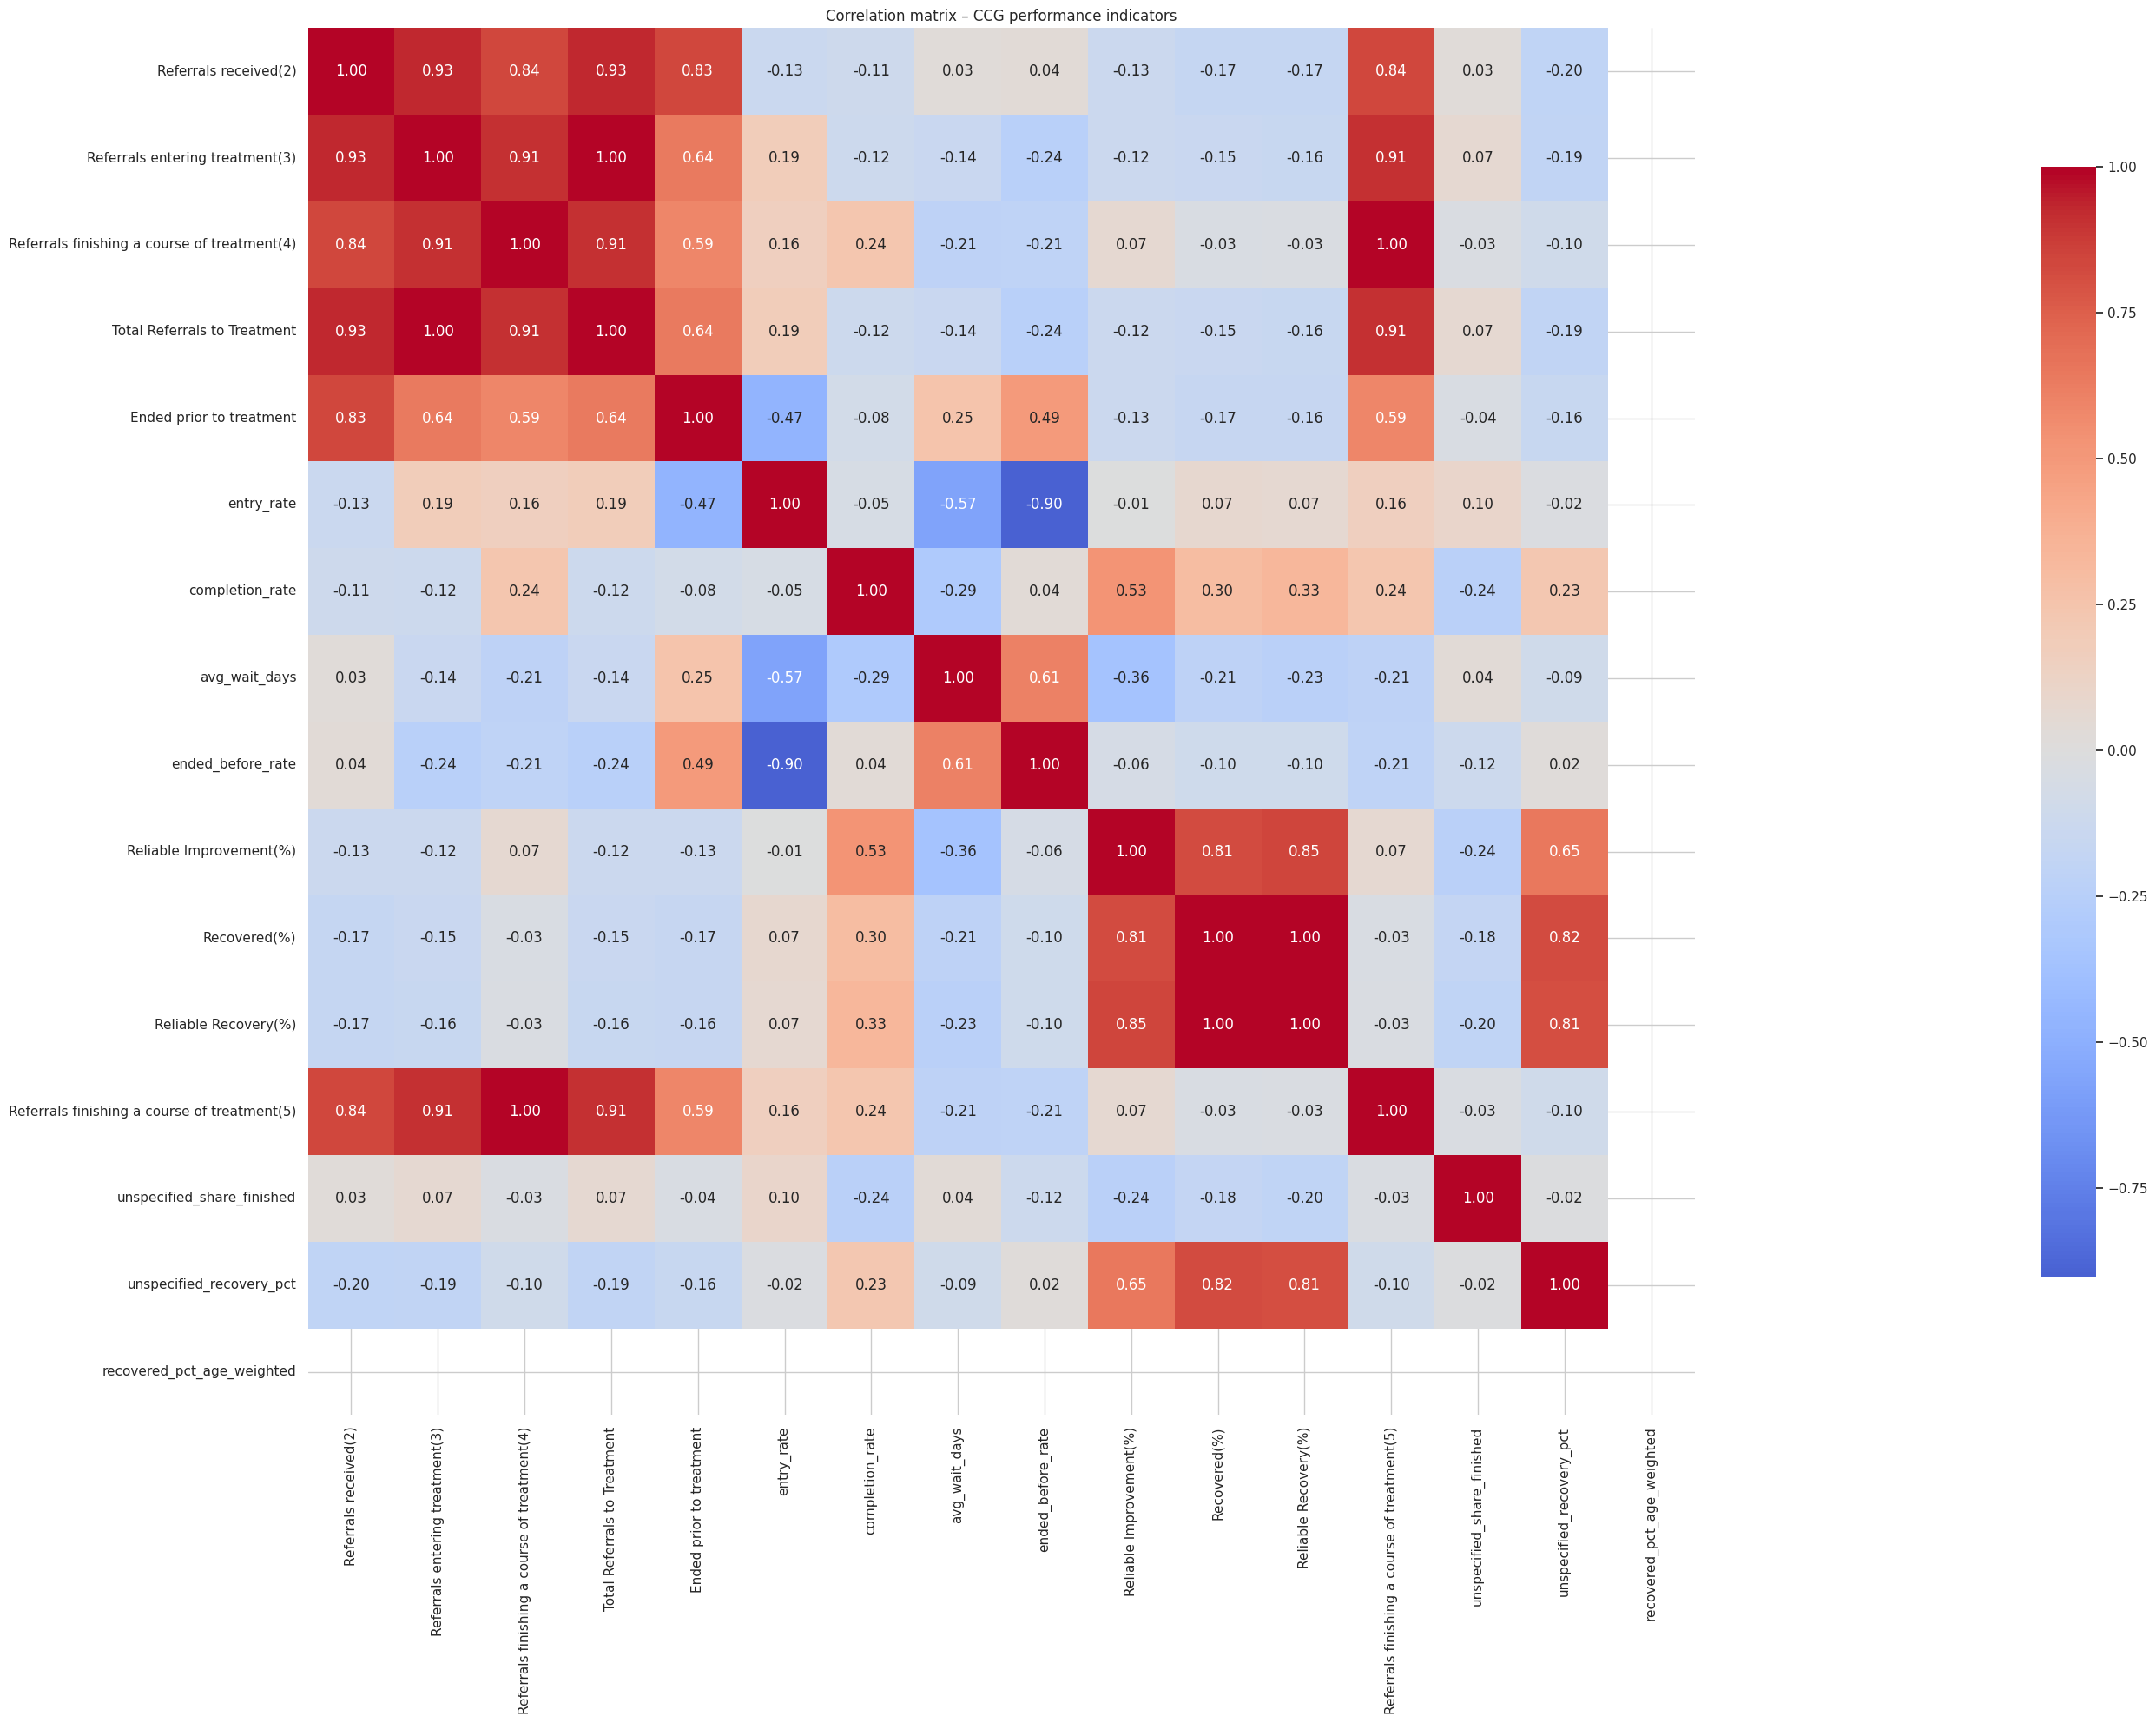

In [26]:
# Core numeric indicators for descriptive analysis
perf_cols = [
    "Referrals received(2)",
    "Referrals entering treatment(3)",
    "Referrals finishing a course of treatment(4)",
    "Total Referrals to Treatment",
    "Ended prior to treatment",
    "entry_rate",
    "completion_rate",
    "avg_wait_days",
    "ended_before_rate",
    "Reliable Improvement(%)",
    "Recovered(%)",
    "Reliable Recovery(%)",
    "Referrals finishing a course of treatment(5)",
    "unspecified_share_finished",
    "unspecified_recovery_pct",
    "recovered_pct_age_weighted",
]

perf_numeric = ccg_perf[perf_cols].apply(pd.to_numeric, errors="coerce")

print("Descriptive statistics for key indicators:")
display(perf_numeric.describe().T)

corr = perf_numeric.corr()

plt.figure(figsize=(80, 20))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8},
    annot=True,
    fmt=".2f",
)
plt.title("Correlation matrix – CCG performance indicators")
plt.tight_layout()
plt.show()


Number of CCGs used for clustering: 186
Cluster sizes:


cluster
0    80
1    56
2    50
Name: count, dtype: int64

Cluster-wise mean profiles:


,entry_rate,completion_rate,avg_wait_days,ended_before_rate,Reliable Improvement(%),Recovered(%),Reliable Recovery(%),unspecified_share_finished,unspecified_recovery_pct
cluster,,,,,,,,,
0,67.94,63.32,27.16,30.76,66.35,50.67,48.58,30.99,48.59
1,72.05,51.40,27.76,28.08,53.32,38.02,35.87,44.73,34.44
2,50.47,56.57,53.58,46.10,58.69,43.05,40.85,36.56,41.24


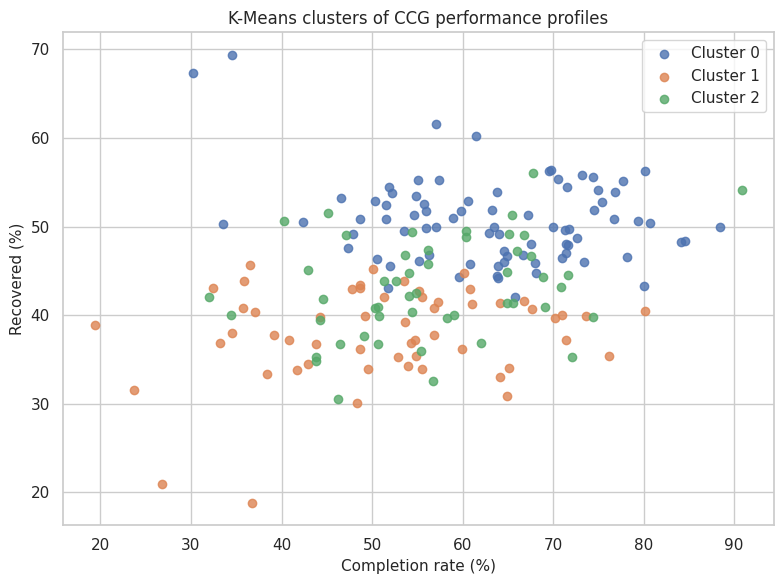

In [27]:
# Features for clustering – all reasonably populated
cluster_features = [
    "entry_rate",
    "completion_rate",
    "avg_wait_days",
    "ended_before_rate",
    "Reliable Improvement(%)",
    "Recovered(%)",
    "Reliable Recovery(%)",
    "unspecified_share_finished",
    "unspecified_recovery_pct",
]

X_cluster = perf_numeric[cluster_features].dropna().copy()

print("Number of CCGs used for clustering:", X_cluster.shape[0])

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Attach cluster labels back to CCGs (for the subset with full data)
ccg_for_cluster = ccg_perf.loc[X_cluster.index, ["CCG Code", "CCG Name"]].copy()
ccg_for_cluster["cluster"] = cluster_labels

print("Cluster sizes:")
display(ccg_for_cluster["cluster"].value_counts().sort_index())

# Add cluster to full table (NaN for CCGs not in X_cluster)
ccg_perf["cluster"] = np.nan
ccg_perf.loc[ccg_for_cluster.index, "cluster"] = ccg_for_cluster["cluster"]

# Cluster-wise mean profiles
cluster_profile = (
    ccg_for_cluster
    .join(X_cluster)
    .groupby("cluster")[cluster_features]
    .mean()
    .round(2)
)

print("Cluster-wise mean profiles:")
display(cluster_profile)

# Visualise clusters on completion vs recovery axes
plt.figure(figsize=(8, 6))
palette = sns.color_palette("tab10", n_colors=3)

for cid in sorted(ccg_for_cluster["cluster"].unique()):
    mask = ccg_for_cluster["cluster"] == cid
    plt.scatter(
        X_cluster.loc[mask, "completion_rate"],
        X_cluster.loc[mask, "Recovered(%)"],
        label=f"Cluster {cid}",
        alpha=0.8,
    )

plt.xlabel("Completion rate (%)")
plt.ylabel("Recovered (%)")
plt.title("K-Means clusters of CCG performance profiles")
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
# Regression: Recovered(%) ~ service-flow and data-quality indicators
regression_features = [
    "entry_rate",
    "completion_rate",
    "avg_wait_days",
    "ended_before_rate",
    "unspecified_share_finished",
    "unspecified_recovery_pct",
]

target_col = "Recovered(%)"

reg_df = perf_numeric[regression_features + [target_col]].dropna().copy()

X_reg = reg_df[regression_features].values
y_reg = reg_df[target_col].values

lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)

r2 = lin_reg.score(X_reg, y_reg)

print("Linear regression: explain Recovered(%):")
print(f"R^2 (explained variance): {r2:.3f}")

coef_table = pd.DataFrame(
    {
        "feature": regression_features,
        "coefficient": lin_reg.coef_,
    }
)

display(coef_table)
print(f"Intercept: {lin_reg.intercept_:.3f}")


Linear regression: explain Recovered(%):
R^2 (explained variance): 0.715


,feature,coefficient
0,entry_rate,0.014348
1,completion_rate,0.054015
2,avg_wait_days,-0.000218
3,ended_before_rate,-0.033942
4,unspecified_share_finished,-0.040740
5,unspecified_recovery_pct,0.663666


Intercept: 15.305
